<a href="https://colab.research.google.com/github/SeyedJalaleddinMousavirad/Pytorch/blob/main/06_ANN_for_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) ANN for CLassificaion Task

2)Dataset: MNIST

3)Run on GPU

4)Batch gradient descent rather than gradient descent


In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt


In [3]:
train_dataset = torchvision.datasets.MNIST(
root= '.',
train=True,    
transform = transforms.ToTensor(),
download = True
)
#root: the file path we want to download the data
#train: this function returns the train dataset

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [5]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [6]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [7]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [8]:
test_dataset=torchvision.datasets.MNIST(
  root='.',
  train=False,
  transform=transforms.ToTensor(),
  download=True)

In [9]:
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [10]:
#build model
model = nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,10)
)
#we do not need amy softmax since it is combined with cross entropy loss

In [11]:
#We want to run the program on GPU
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [12]:
#Loss and Optimiser
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [13]:
#Data Loader
batch_size=128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

#It is important that shuffle should be True for training set, while it should be Flase for test set
#Because for the training data, if we loop through each sample in the same order each time, we have unwanted corrlation, which decreases perfromance
#

In [14]:
#Check out how dataloader works
#maps the data values between 0 and 1
#Makes the data of shape (batch size, color, height, width)
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=2,
                                          shuffle=True
                                          )

for x,y in tmp_loader:
  print(x)
  print(x.shape)
  print(y.shape)
  break


tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])
torch.Size([2, 1, 28, 28])
torch.Size([2])


In [15]:
train_dataset.transform(train_dataset.data.numpy()).max()

tensor(1.)

In [16]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [17]:
#Train the model
n_epochs=10
#it is important to note that the number of iterations is : #epochs * #batches
#Array to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  train_loss=[]
  for inputs, targets in train_loader:
    #Move data to GPU
    inpus, targets = inputs.to(device), targets.to(device)

    #Reshape the input
    inputs=inputs.view(-1,784)

    #Zero the parameters
    optimizer.zero_grad()

    #Forward pass
    outputs=model(inputs)
    loss = criterion (outputs,targets)

    #Backward and optimise
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())

  #Get train loss and test loss
  train_loss = np.mean(train_loss)
  test_loss = []
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1,784)
    outputs = model (inputs)
    loss = criterion (outputs,targets)
    test_loss.append(loss.item())
  test_loss=np.mean(test_loss) 

  #Save losses
  train_losses[it] = train_loss
  test_losses[it] = test_loss

  print(f' Epoch {it+1} / {n_epochs}, Train Loss: {train_loss:.4f}, Test Loss:{train_loss:.4f}')








 Epoch 1 / 10, Train Loss: 0.4127, Test Loss:0.4127
 Epoch 2 / 10, Train Loss: 0.1929, Test Loss:0.1929
 Epoch 3 / 10, Train Loss: 0.1393, Test Loss:0.1393
 Epoch 4 / 10, Train Loss: 0.1088, Test Loss:0.1088
 Epoch 5 / 10, Train Loss: 0.0875, Test Loss:0.0875
 Epoch 6 / 10, Train Loss: 0.0726, Test Loss:0.0726
 Epoch 7 / 10, Train Loss: 0.0619, Test Loss:0.0619
 Epoch 8 / 10, Train Loss: 0.0526, Test Loss:0.0526
 Epoch 9 / 10, Train Loss: 0.0447, Test Loss:0.0447
 Epoch 10 / 10, Train Loss: 0.0387, Test Loss:0.0387


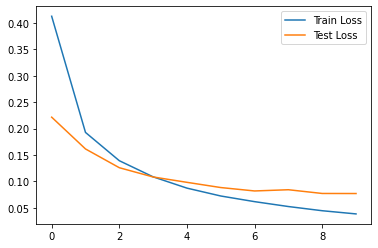

In [18]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [19]:
#Calculate the accuracy

n_correct = 0
n_total = 0
for inputs, targets in train_loader:
  #move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  #Reshape the input
  inputs = inputs.view(-1,784)
  #forward pass
  outputs = model (inputs)

  #get prediction
  #torch.max : it returns both max and argmax
  _, predictions = torch.max(outputs,1)

  n_correct +=(predictions ==targets).sum().item()
  n_total +=targets.shape[0]

train_acc=n_correct/n_total  

for inputs, targets in test_loader:
  #move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  #Reshape the input
  inputs = inputs.view(-1,784)
  #forward pass
  outputs = model (inputs)

  #get prediction
  #torch.max : it returns both max and argmax
  _, predictions = torch.max(outputs,1)

  n_correct +=(predictions ==targets).sum().item()
  n_total +=targets.shape[0]

test_acc=n_correct/n_total 

print(f"train acc:{train_acc:.4f}, test acc: {test_acc:.4f}")





train acc:0.9929, test acc: 0.9906


In [20]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  """
  The function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")

  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'

  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[ 970    0    2    1    1    2    2    1    1    0]
 [   0 1123    4    0    0    1    2    0    5    0]
 [   6    0 1005    0    2    0    4    9    6    0]
 [   0    0    6  982    1    4    1    6    6    4]
 [   2    0    0    1  954    1    7    4    1   12]
 [   2    0    0    7    1  873    3    1    4    1]
 [   8    3    1    1    1    4  938    0    2    0]
 [   1    3    8    1    0    0    0 1008    1    6]
 [   9    0    5    3    4    3    2    8  937    3]
 [   1    3    0    7    7    4    1    7    1  978]]


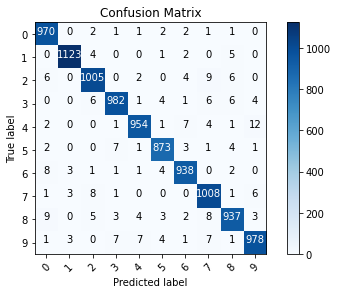

In [21]:
# get all predictions in an array and plot confusion matrix
x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])
for inputs, targets in test_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # reshape the input
  inputs = inputs.view(-1, 784)

  # forward pass
  outputs = model(inputs)

  # get the prediction
  #torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # update p_test
  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [40]:
bbb=np.where(p_test != y_test)
print(bbb[0][1])


61


Text(0.5, 1.0, 'True label: 4 Predicted: 9')

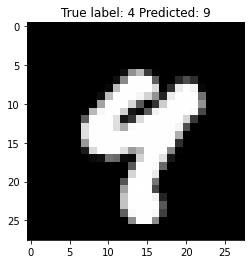

In [41]:
# show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], int(p_test[i])))